# Loan Eligibility Problem

## Problem Statement:

This dataset concerns on loan data. When a customer applies for a loan at our company, we use statistical models to determine whether or not to grant the loan based on likelihood of the loan being paid. The factors involved in determining this likelihood are complex and extensive statistical analysis and modelling are required to predict the outcome for each individual case. We are implementing model that predicts if a loam should be granted to an individual based on the data provided in training dataset.
The dataset used is an anonymized synthetic data that was generated specifically for use in this project. The data is designed to exhibit similar characteristics to genuine loan data.

## Description of the data:
In This dataset we have over 1,00,000 loan records to determine the best way to predict whether a loan applicant should be granted a loan or not .Build a machine learning model that returns a unique customer id and loan status label which indicates whether the loan should be given to that individual or not.  

The dataset consists of the following fields/feature in the csv file: 

- Loan ID: A unique identifier for the loan information
- Customer ID: A unique identifier for the customer (Customer may have more than one loan)
- Loan Status : A categorical variable indicating if the loan was given to the customer (i.e loan given or loan refused)
- Current Loan amount: This is the loan amount that either completely paid off or the amount was defaulted
- Term: A categorical variable indicating if it is a short term or long term loan
- Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history
- Years in current job: A categorical variable indicating how many years the customer has been in their current job
- Home Ownership: A categorical variable indicating home ownership , values are “RENT”,”HOME MORTGAGE” and “OWN”. If the value is own , then the customer is a home owner with no mortgage
- Annual Income: The customer’s annual income
- Purpose: A description of the purpose of the loan
- Monthly Debt: The customer’s monthly payment for their existing loans
- Years of credit score :The years since the first entry in the customer’s credit history
- Months since last delinquent: Months since the last delinquent payment
- Number of open accounts: The total number of open credit cards
- Number of credit problems: The number of credit problems in the customer records
- Current Credit balance: the current total debt for the customer
- Maximum open credit: the maximum credit limit for all credit sources
- Bankruptcies: the number of bankruptcies
- Tax Liens: the number of tax liens

### Loading Libraries

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
import scipy.stats       as stats
import datetime          as dt
import matplotlib
import pydotplus

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from math                      import sqrt
from sklearn.model_selection   import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression, LogisticRegression
from sklearn.linear_model      import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model      import ElasticNetCV, ElasticNet
from sklearn.metrics           import mean_squared_error
from sklearn.metrics           import r2_score, roc_auc_score, roc_curve, cohen_kappa_score
from sklearn.metrics           import confusion_matrix, accuracy_score, classification_report
from sklearn.tree              import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.externals.six     import StringIO
from sklearn.preprocessing     import StandardScaler
from sklearn.ensemble          import RandomForestClassifier, VotingClassifier
from sklearn.neighbors         import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm               import SVC, SVR
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.experimental      import enable_iterative_imputer
from sklearn.impute            import IterativeImputer

from scipy.stats               import randint as sp_randint

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling    import SMOTE

from scipy.stats               import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare



### Loading Dataset

In [2]:
lp = pd.read_csv('LoansTrainingSetV2.csv')
lp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


### Nature of the Data

In [3]:
print("Dataset contains",lp.shape[0],"observations and" , lp.shape[1], "attributes")

Dataset contains 111107 observations and 19 attributes


### Dataset Attributes

In [4]:
lp.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Statistical Overview

In [5]:
lp.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


### Concise summary of the data

In [6]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [7]:
dfb=lp.copy()

### Variable Categorization

In [8]:
cat_cols = lp.select_dtypes(['object']).columns
print("Count of categorical values are",cat_cols.value_counts().sum())

Count of categorical values are 9


In [9]:
lp['Credit Score'].skew()

3.8674055889005907

In [10]:
num_cols = lp.select_dtypes(['float64','int64']).columns
print("Count of numerical values are",num_cols.value_counts().sum())

Count of numerical values are 10


In [11]:
dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].replace({'#VALUE!':np.nan})

dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].astype(float)

dfb['Maximum Open Credit'].isnull().sum()

2

In [12]:
dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].fillna(dfb['Maximum Open Credit'].median())

In [13]:
dfb['Monthly Debt']=dfb['Monthly Debt'].replace({'$1051.41':'1051.41','$157.15':'157.15','$944.7':'944.7','$481.34':'481.34','$1838.98':'1838.98','$471.6':'471.6'})

dfb['Monthly Debt']=dfb['Monthly Debt'].astype(float)

In [14]:
dfb['Tax Liens'] = dfb['Tax Liens'].astype('object')

In [15]:
dfb['Bankruptcies'] = dfb['Bankruptcies'].astype('object')

In [16]:
dfb['Tax Liens'] = dfb['Tax Liens'].fillna(dfb['Tax Liens'].mode()[0])

In [17]:
dfb['Bankruptcies'] = dfb['Bankruptcies'].fillna(dfb['Bankruptcies'].mode()[0])

In [18]:
dfb=dfb.drop('Months since last delinquent',axis=1)

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
mice_imputer= IterativeImputer(initial_strategy='median',imputation_order='random',random_state=3)

In [21]:
df2=dfb[['Credit Score','Annual Income']]

In [22]:
df2.iloc[:,:]=np.round(mice_imputer.fit_transform(df2))

In [23]:
df1=dfb.drop(columns=['Credit Score','Annual Income'],axis=1)

In [24]:
result= pd.concat([df1,df2], axis=1)

In [25]:
result['Credit Score']=result[result['Credit Score']<=800]['Credit Score']

In [26]:
result['Credit Score']= result['Credit Score'].fillna(800)

In [27]:
result['Credit Score'].skew()

-0.04321025021475512

In [28]:
result['Tax Liens'] = result['Tax Liens'].astype('object')

In [29]:
result['Bankruptcies'] = result['Bankruptcies'].astype('object')

In [30]:
num_cols1 = result.select_dtypes(['float64','int64']).columns

In [31]:
from scipy.stats import skew, norm, probplot, boxcox

In [32]:
skewed_features = result[num_cols1].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})  

In [33]:
# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} highest skewed numerical features to box cox transform".format(skewness.shape[0]))

There are 8 highest skewed numerical features to box cox transform


In [34]:
#Create Empty list 
l_opt = {}

#create for loop for skewness.index
for feat in skewness.index:
    result[feat], l_opt[feat] = boxcox((result[feat]+1))

In [35]:
#create skewed_features2 for skewness.index
skewed_features2 = result[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2}) 

In [36]:
# concat both skewness, skewness2
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

,Skew,New Skew
Maximum Open Credit,136.993677,0.659540
Annual Income,49.780770,-0.000847
Current Credit Balance,14.184075,0.193766
Number of Credit Problems,4.904700,2.084735
Current Loan Amount,2.419085,0.250956
Monthly Debt,2.212429,0.049988
Number of Open Accounts,1.182993,0.002508
Years of Credit History,1.071703,0.001111


In [37]:
skewed_features2

Number of Credit Problems    2.084735
Maximum Open Credit          0.659540
Current Loan Amount          0.250956
Current Credit Balance       0.193766
Monthly Debt                 0.049988
Number of Open Accounts      0.002508
Years of Credit History      0.001111
Annual Income               -0.000847
dtype: float64

In [38]:
result['Credit Score']=np.log1p(result['Credit Score'])

In [39]:
result['Purpose']=result['Purpose'].replace({'other':'Other'})

In [40]:
result['Credit Score'].skew()

-0.2131917238359278

In [41]:
result['Loan Status']=result['Loan Status'].replace({'Charged Off': 0,'Fully Paid': 1 })

In [42]:
result['Term']=result['Term'].replace({'Short Term': 0, 'Long Term': 1})

In [43]:
result = result.drop(['Loan ID','Customer ID'],axis=1)

In [44]:
result['Years of Credit History'].skew()

0.0011105491311304123

In [45]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                111107 non-null  int64  
 1   Current Loan Amount        111107 non-null  float64
 2   Term                       111107 non-null  int64  
 3   Years in current job       106414 non-null  object 
 4   Home Ownership             111107 non-null  object 
 5   Purpose                    111107 non-null  object 
 6   Monthly Debt               111107 non-null  float64
 7   Years of Credit History    111107 non-null  float64
 8   Number of Open Accounts    111107 non-null  float64
 9   Number of Credit Problems  111107 non-null  float64
 10  Current Credit Balance     111107 non-null  float64
 11  Maximum Open Credit        111107 non-null  float64
 12  Bankruptcies               111107 non-null  object 
 13  Tax Liens                  11

In [46]:
result.describe()

,Loan Status,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income
count,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000,111107.000000
mean,0.773435,2.633961,0.277507,30.683766,3.174099,2.935393,0.014951,41.172035,30.787729,6.601425,10.892508
std,0.418611,0.036285,0.447771,8.432926,0.427619,0.590554,0.037182,11.709927,6.618632,0.058830,0.458625
min,0.000000,2.437091,0.000000,0.000000,1.601176,0.000000,0.000000,0.000000,0.000000,6.373320,8.200566
25%,1.000000,2.615277,0.000000,25.434454,2.910520,2.609941,0.000000,34.100710,27.051743,6.568078,10.627725
50%,1.000000,2.633357,0.000000,30.716738,3.161123,2.894780,0.000000,40.940976,30.598434,6.598509,11.001888
75%,1.000000,2.647283,1.000000,35.992513,3.447729,3.352527,0.000000,48.143145,34.373352,6.621406,11.097190
max,1.000000,2.710361,1.000000,111.695141,4.893402,6.159637,0.107565,167.741866,167.814532,6.685861,15.605556


### Data Preprocessing

Data preprocessing is done to enhance the quality of data to promote extraction of meaningful insights from the data.
In simple words, cleaning and organizing the raw data to make it suitable for building and training machine learning models.
Data preprocessing in machine learning is a data mining technique that transforms raw data into an understandable and readable format.

Here Data Preprocessing is going to be done through each columns

Checking for Outliers

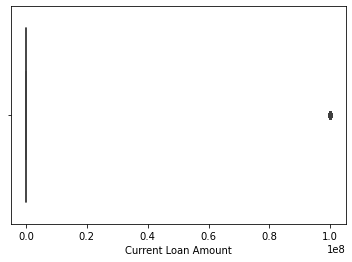

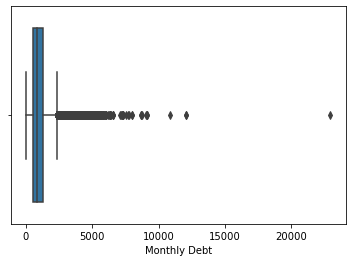

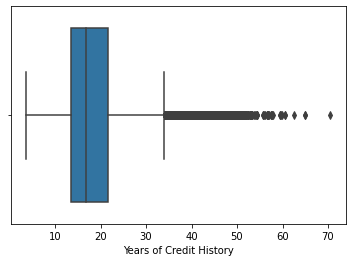

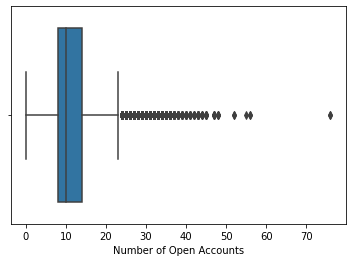

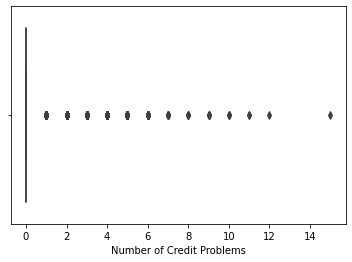

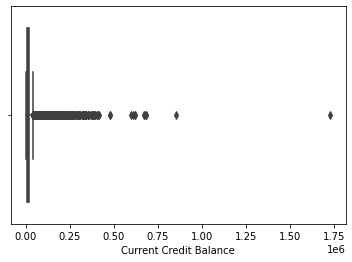

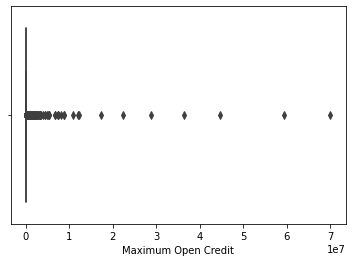

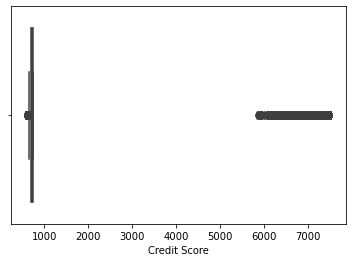

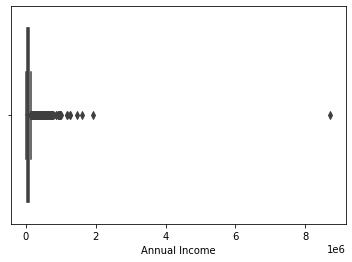

In [47]:
for col in num_cols1:
    sns.boxplot(dfb[col])
    plt.show()

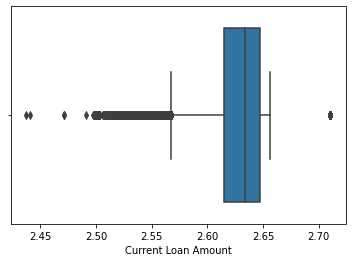

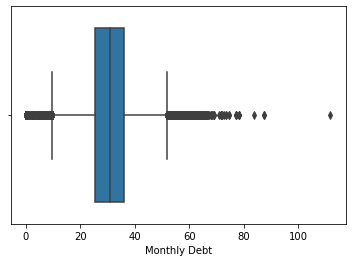

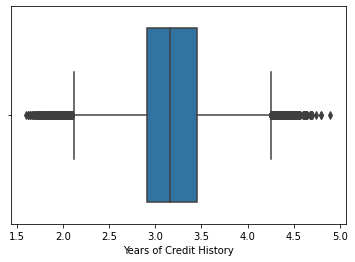

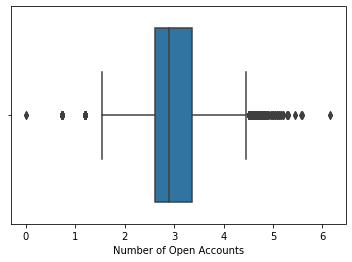

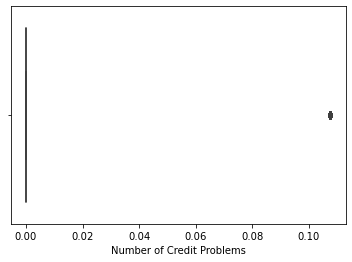

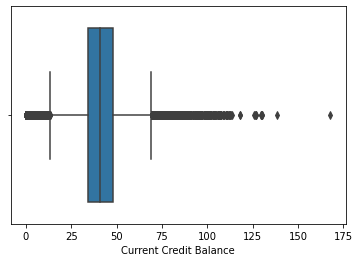

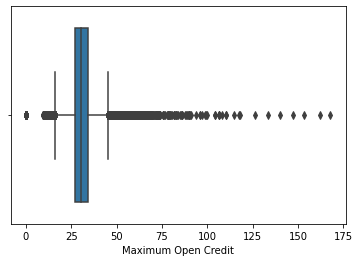

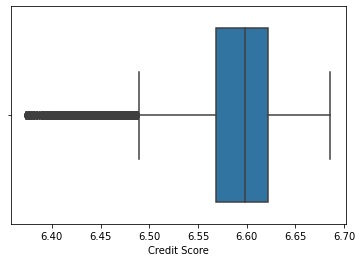

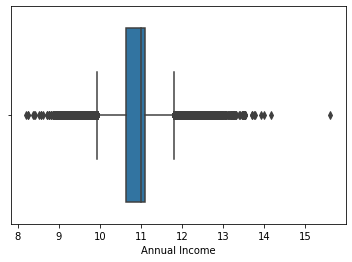

In [48]:
for col in num_cols1:
    sns.boxplot(result[col])
    plt.show()

In [49]:
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon

In [50]:
cat_cols=['Years in current job','Home Ownership','Purpose','Tax Liens','Term','Bankruptcies']

In [51]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=stats.chi2_contingency(np.array(pd.crosstab(result[i],result['Loan Status'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])

In [52]:
p_value

[4.839283790867385e-05,
 1.5373178904528492e-67,
 7.300080869073768e-36,
 0.025847191259009597,
 5.275922191927291e-291,
 0.28626320187784615]

From the chi square test and from the above pvalues the pvalue of 'Bankruptcies' > 0.05 hence it is not significant feature apart from that all other categorical variables are significant since there pvalue is lesser than 0.05

In [53]:
result.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Credit Score', 'Annual Income'],
      dtype='object')

#### Statistical tests for Numerical variables

In [54]:
no = result [ result [ "Loan Status" ] == 0 ] [ "Current Loan Amount" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Current Loan Amount" ]
print ( shapiro ( result [ "Current Loan Amount" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Loan Amount is significant." )
print ( "\n" )

no = result [ result [ "Loan Status" ] == 0 ] [ "Credit Score" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Credit Score" ]
print ( shapiro (result[ "Credit Score" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print(mannwhitneyu ( no, yes))
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Credit Score is significant." )
print ( "\n" )

no = result [ result [ "Loan Status" ] == 0 ] [ "Annual Income" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Annual Income" ]
print ( shapiro ( result[ "Annual Income" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Annual Income is significant." )
print ( "\n" )

no = result [result [ "Loan Status" ] == 0 ] [ "Monthly Debt" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Monthly Debt" ]
print ( shapiro ( result [ "Monthly Debt" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Monthly Debt is significant." )
print ( "\n" )

no = result [ result [ "Loan Status" ] == 0 ] [ "Years of Credit History" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Years of Credit History" ]
print ( shapiro ( result [ "Years of Credit History" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Years of Years of Credit History is significant." )
print ( "\n" )

no = result [ result [ "Loan Status" ] == 0 ] [ "Number of Open Accounts" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Number of Open Accounts" ]
print ( shapiro ( result [ "Number of Open Accounts" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Number of Open Accounts is significant." )
print ( "\n" )


no = result [ result [ "Loan Status" ] == 0 ] [ 'Number of Credit Problems' ]
yes = result [ result [ "Loan Status" ] == 1 ] [ 'Number of Credit Problems' ]
print ( shapiro ( result [ 'Number of Credit Problems' ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Number of Credit Problems is insignificant." )
print ( "\n" )


no = result [ result [ "Loan Status" ] == 0 ] [ "Current Credit Balance" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Current Credit Balance" ]
print ( shapiro ( result [ "Current Credit Balance" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Credit Balance is significant." )
print ( "\n" )

no = result [ result [ "Loan Status" ] == 0 ] [ "Maximum Open Credit" ]
yes = result [ result [ "Loan Status" ] == 1 ] [ "Maximum Open Credit" ]
print ( shapiro ( result [ "Maximum Open Credit" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Maximum Open Credit is significant." )
print ( "\n" )

(0.9146707057952881, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=975312301.5, pvalue=3.4888300978058134e-125)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Loan Amount is significant.


(0.9233394265174866, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=868843543.5, pvalue=0.0)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Credit Score is significant.


(0.971626341342926, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=985920224.0, pvalue=1.963548080269194e-102)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Annual Income is significant.


(0.9964699745178223, 7.003129205309706e-41)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=1063205158.0, pvalue=1.9607003018434183e-05)
Since

Here we could infer that all numerical columns are significant

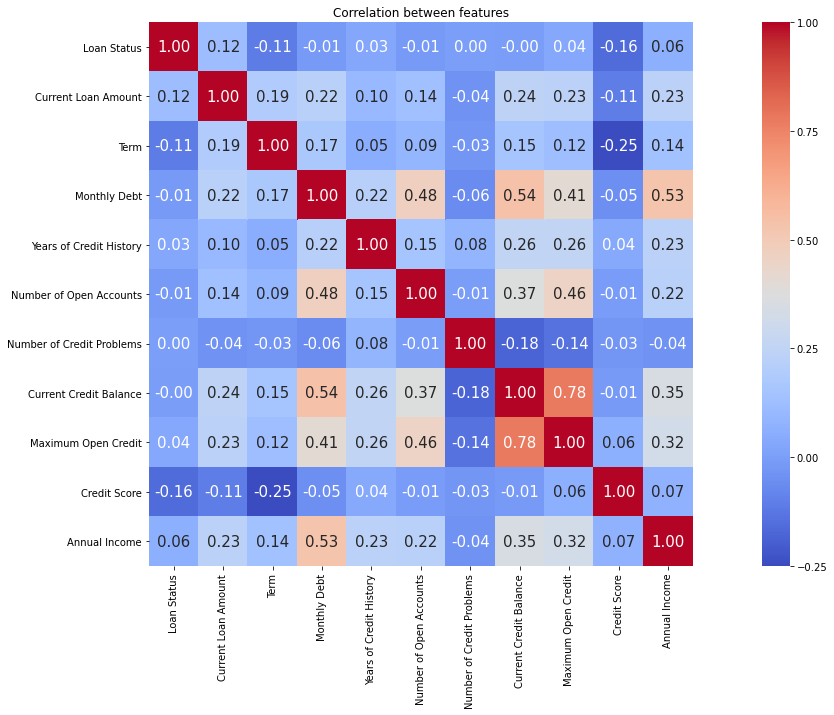

In [55]:
plt.figure(figsize=(25, 10))
sns.heatmap(result.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [56]:
dfff=pd.get_dummies(data=result,columns=['Years in current job','Home Ownership','Purpose','Tax Liens'],drop_first=True)

In [57]:
dfff.head()

,Loan Status,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
0,0,2.628870,0,29.582577,3.232674,3.138639,0.000000,35.489959,24.372832,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.648463,1,31.284662,3.691188,3.352527,0.000000,57.337438,40.890921,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.637041,0,35.778495,3.147673,3.021021,0.107394,41.206149,28.177362,1,...,0,0,0,0,0,0,0,0,0,0
3,0,2.627516,0,32.644751,2.586833,3.948466,0.000000,35.866201,35.955078,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.621635,1,24.756381,3.147673,3.248823,0.107394,46.326224,30.026383,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dfff.shape

(111107, 51)

In [59]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Loan Status                     111107 non-null  int64  
 1   Current Loan Amount             111107 non-null  float64
 2   Term                            111107 non-null  int64  
 3   Monthly Debt                    111107 non-null  float64
 4   Years of Credit History         111107 non-null  float64
 5   Number of Open Accounts         111107 non-null  float64
 6   Number of Credit Problems       111107 non-null  float64
 7   Current Credit Balance          111107 non-null  float64
 8   Maximum Open Credit             111107 non-null  float64
 9   Bankruptcies                    111107 non-null  object 
 10  Credit Score                    111107 non-null  float64
 11  Annual Income                   111107 non-null  float64
 12  Years in current

In [60]:
from sklearn.model_selection import train_test_split
X=dfff.drop(['Loan Status','Bankruptcies'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.491150
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.080     
Dependent Variable:          Loan Status             AIC:                     76495.3837
Date:                        2020-08-27 19:15        BIC:                     76949.2002
No. Observations:            77774                   Log-Likelihood:          -38199.   
Df Model:                    48                      LL-Null:                 -41543.   
Df Residuals:                77725                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|     [0.025     0

In [62]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
res = GLM(y_train, X_train,
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan Status   No. Observations:                77774
Model:                            GLM   Df Residuals:                    77725
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38199.
Date:                Thu, 27 Aug 2020   Deviance:                       76397.
Time:                        19:15:38   Pearson chi2:                 7.67e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Current Loan

In [63]:
infl = res.get_influence(observed=False)

In [64]:
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)[:10]

,dfb_Current Loan Amount,dfb_Term,dfb_Monthly Debt,dfb_Years of Credit History,dfb_Number of Open Accounts,dfb_Number of Credit Problems,dfb_Current Credit Balance,dfb_Maximum Open Credit,dfb_Credit Score,dfb_Annual Income,...,dfb_Tax Liens_7.0,dfb_Tax Liens_8.0,dfb_Tax Liens_9.0,dfb_Tax Liens_10.0,dfb_Tax Liens_11.0,dfb_Tax Liens_15.0,cooks_d,standard_resid,hat_diag,dffits_internal
74634,0.000109,0.010195,-0.008391,0.002342,-0.001468,-0.001756,-0.002853,0.004551,0.007132,-0.015600,...,0.000448,3.182667e-09,-1.356487,-1.486284e-09,-1.245034e-09,-9.971195e-10,0.037635,-2.068217,0.301248,-1.357991
67606,-0.005593,0.007987,-0.008185,-0.002744,0.023188,0.000401,0.013307,-0.013826,0.002430,0.006127,...,-0.000076,3.103282e-09,-0.000216,1.215473e-09,-8.872033e-10,6.767482e-11,0.025650,-3.434110,0.096309,-1.121085
20008,-0.007800,-0.000494,0.006142,0.007174,0.000087,-0.001938,-0.005540,0.003603,0.009931,-0.006631,...,0.000184,1.109351e-09,1.058762,9.510796e-10,2.600429e-09,-1.151683e-09,0.022911,1.295620,0.400761,1.059546
100624,-0.007256,0.013409,-0.002388,-0.005139,0.001482,0.000402,-0.003831,0.000571,0.004524,0.006699,...,0.884194,-9.440190e-10,-0.000063,-2.549878e-10,1.244015e-09,5.688119e-10,0.015994,1.551875,0.245517,0.885263
74385,-0.000747,0.004292,-0.001694,0.003393,-0.002503,-0.001650,-0.002642,-0.000101,-0.000384,0.004467,...,-0.725493,1.539231e-10,-0.000034,1.918349e-10,-1.493522e-10,2.263216e-11,0.010766,-1.200956,0.267816,-0.726332
77902,-0.003253,0.006800,0.013332,-0.006908,0.009393,0.002656,0.020518,-0.023532,0.013523,-0.021753,...,0.000094,1.702342e-09,0.000222,1.522795e-09,7.996662e-10,1.169069e-09,0.007681,-2.969877,0.040923,-0.613470
927,0.004805,0.000536,-0.000017,-0.006057,-0.000388,0.002282,0.001761,0.001073,-0.005125,0.001358,...,-0.605452,-4.863019e-10,-0.000063,-5.389458e-10,-7.784660e-10,-7.184210e-10,0.007508,-1.014815,0.263203,-0.606539
50644,-0.005627,0.008530,0.006555,-0.002444,-0.002492,-0.001039,-0.002400,-0.001995,0.010474,-0.006711,...,0.000124,1.696635e-09,0.000046,5.662672e-10,-1.059144e-10,3.752408e-10,0.005599,-1.637499,0.092814,-0.523770
3717,0.004662,0.001025,-0.005071,0.002571,0.003376,0.000446,0.002606,0.001535,-0.005766,0.000228,...,0.000064,-2.485011e-10,-0.000071,6.196597e-12,-4.533305e-10,-2.656687e-10,0.004361,-1.083528,0.153991,-0.462274
106862,0.004455,0.003667,-0.006268,-0.003287,-0.000537,0.000514,0.002191,-0.000530,-0.003257,-0.001426,...,0.000045,4.288407e-10,0.447342,-1.032655e-09,-1.886998e-09,3.212500e-10,0.004092,0.685595,0.299007,0.447766


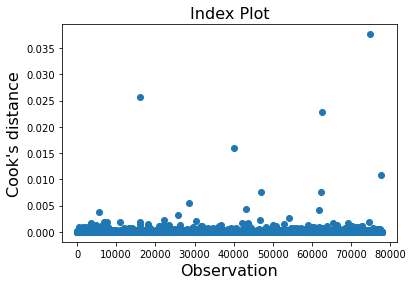

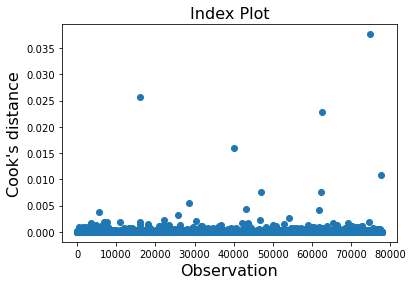

In [65]:
infl.plot_index(y_var='cooks', threshold=2 * infl.cooks_distance[0].mean())

In [66]:
pd.set_option('display.max_columns',None)

In [67]:
Xc =sm.add_constant(X)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.162478,1.137532,2.103249,1.206364,1.507652,1.211447,3.226633,2.969381,1.127028,1.573104,2.809891,1.711865,1.648684,1.497195,1.543586,1.46014,1.454071,1.37793,1.326479,1.640019,191.56983,64.376391,186.24011,1.425949,1.796767,11.06185,1.066518,4.485325,1.706859,6.26756,1.955314,1.229917,1.095851,1.006578,1.179027,1.062087,1.071596,1.100648,1.028609,1.009328,1.005499,1.001748,1.001174,1.00126,1.000512,1.000549,1.000144,1.000445,1.000222


From the Above Muliticollinearity test the column 'Home Ownership_Home Mortgage' VIF is 191.570088 which is very high hence we are dropping that column

In [69]:
X=dfff.drop(['Loan Status','Bankruptcies','Number of Credit Problems','Home Ownership_Home Mortgage'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [70]:
Xc =sm.add_constant(X)

In [71]:
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.161947,1.137223,2.102991,1.188114,1.502836,3.182419,2.967242,1.125232,1.573083,2.809869,1.711128,1.648307,1.497051,1.543311,1.460019,1.454069,1.37793,1.326471,1.638989,1.107826,1.26853,1.425875,1.796759,11.057529,1.066408,4.482693,1.706746,6.267503,1.354836,1.229872,1.095846,1.006558,1.179024,1.062078,1.071583,1.003403,1.001543,1.001072,1.001158,1.000502,1.000416,1.000782,1.00038,1.000221,1.000082,1.000299,1.000148


From the Above Muliticollinearity test the column 'Purpose_Debt Consolidation' VIF is 11.057627 which is very high hence we are dropping that column

In [72]:
X=dfff.drop(['Loan Status','Bankruptcies','Number of Credit Problems','Home Ownership_Home Mortgage','Purpose_Debt Consolidation'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [73]:
Xc =sm.add_constant(X)

In [74]:
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.161583,1.137124,2.101104,1.187985,1.500571,3.173981,2.962035,1.121971,1.567247,2.809646,1.711064,1.648162,1.497012,1.54323,1.460013,1.454042,1.377929,1.326442,1.63892,1.107817,1.268415,1.009273,1.016034,1.002529,1.072831,1.011613,1.070762,1.009313,1.005207,1.002834,1.000442,1.002996,1.00224,1.001528,1.003402,1.001535,1.001008,1.001155,1.000415,1.000413,1.00078,1.000379,1.00022,1.000082,1.000299,1.000148


Hence there is no multi-collinearity

In [75]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.491924
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.079     
Dependent Variable:          Loan Status             AIC:                     76609.8612
Date:                        2020-08-27 19:19        BIC:                     77035.8930
No. Observations:            77774                   Log-Likelihood:          -38259.   
Df Model:                    45                      LL-Null:                 -41543.   
Df Residuals:                77728                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|     [0.025     0

confusion matrix - Train 
 [[ 1492 16069]
 [  980 59233]]
Overall accuracy - Train 
 0.7807879239848793
AUC-Train 
 0.6917198392113858
confusion matrix - Test 
 [[  652  6960]
 [  458 25263]]
Overall accuracy - Test 
 0.7774577745777458
AUC-Test 
 0.692812549345402


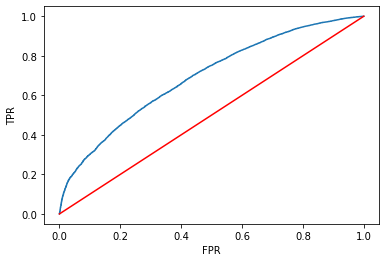

In [76]:
lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [77]:
print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.60      0.08      0.15     17561
           1       0.79      0.98      0.87     60213

    accuracy                           0.78     77774
   macro avg       0.70      0.53      0.51     77774
weighted avg       0.75      0.78      0.71     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.59      0.09      0.15      7612
           1       0.78      0.98      0.87     25721

    accuracy                           0.78     33333
   macro avg       0.69      0.53      0.51     33333
weighted avg       0.74      0.78      0.71     33333



Here the Base model result of AUC score for both Train and Test is ~69% which is a generalized but the score is low hence this is a underfit model

In [78]:
LR=LogisticRegression()
from sklearn import model_selection
kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results = model_selection.cross_val_score(LR, X, y,cv=kfold, scoring='roc_auc')
print(np.mean(cv_results))
print(np.std(cv_results,ddof=1))

0.6457661951138556
0.006979743440785746


In [79]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Current Loan Amount', 'Term', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit', 'Credit Score', 'Annual Income', 'Years in current job_10+ years', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Medical Bills', 'Purpose_moving', 'Purpose_small_business', 'Tax Liens_1.0', 'Tax Liens_2.0', 'Tax Liens_3.0', 'Tax Liens_4.0', 'Tax Liens_5.0']


[1.25544215e-01 1.57344989e-02 1.04375203e-01 1.04314953e-01
 9.22663647e-02 1.03651633e-01 1.04169723e-01 1.35020926e-01
 1.22711329e-01 5.59186122e-03 4.57468547e-03 4.18126711e-03
 5.09674269e-03 5.09516970e-03 4.64662433e-03 4.44024474e-03
 4.52630148e-03 3.93287991e-03 4.96575077e-03 5.88678298e-03
 6.17366009e-03 2.17626372e-03 2.07076455e-03 3.83000615e-04
 4.60229613e-03 2.57171004e-03 8.68343776e-03 1.47729019e-03
 1.44738673e-03 6.09752309e-04 9.52563882e-05 1.46309063e-03
 4.72469667e-04 6.18165285e-04 3.40048233e-03 1.65050902e-03
 6.77329829e-04 3.87626092e-04 1.20176576e-04 5.31534076e-05
 7.58025074e-05 1.58351441e-06 5.49798422e-05 1.88114504e-06
 3.32231080e-06 1.45269490e-06]


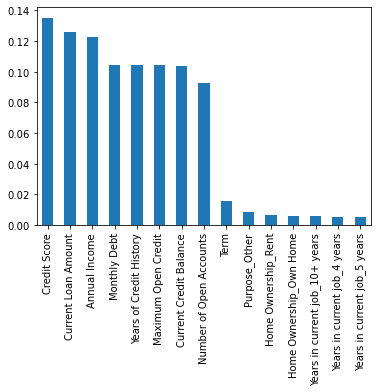

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

In [81]:
feat_importances

Current Loan Amount               0.125544
Term                              0.015734
Monthly Debt                      0.104375
Years of Credit History           0.104315
Number of Open Accounts           0.092266
Current Credit Balance            0.103652
Maximum Open Credit               0.104170
Credit Score                      0.135021
Annual Income                     0.122711
Years in current job_10+ years    0.005592
Years in current job_2 years      0.004575
Years in current job_3 years      0.004181
Years in current job_4 years      0.005097
Years in current job_5 years      0.005095
Years in current job_6 years      0.004647
Years in current job_7 years      0.004440
Years in current job_8 years      0.004526
Years in current job_9 years      0.003933
Years in current job_< 1 year     0.004966
Home Ownership_Own Home           0.005887
Home Ownership_Rent               0.006174
Purpose_Buy House                 0.002176
Purpose_Buy a Car                 0.002071
Purpose_Edu

In [82]:
# RFE 

cols=list(X.columns)
pmax=1
while(len(cols)>0):
    p=[]
    X=X[cols]
    Xc=sm.add_constant(X)
    model=sm.OLS(y,Xc).fit()
    p=pd.Series(model.pvalues[1:],index=cols)
    pmax=max(p)
    feature_with_pvalue_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_pvalue_max)
    else:
        break
selected_features=cols
print(selected_features)

X=dfff[selected_features]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.title('RFE ')
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

X=dfff[selected_features_BE]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

X.columns

rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("R2 score logistic regression train score:", train_score)
print("R2 score logistic regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [84]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Specs','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs         pvalue        Score
7                Credit Score   0.000000e+00  2098.335911
0         Current Loan Amount  1.956683e-241  1108.884137
1                        Term  1.430870e-203   932.398339
8               Annual Income   7.768290e-65   289.650614
20        Home Ownership_Rent   5.625156e-41   179.912543
6         Maximum Open Credit   1.061808e-19    82.534764
3     Years of Credit History   1.182054e-16    68.670357
31     Purpose_small_business   1.676954e-15    63.438242
22          Purpose_Buy a Car   2.297375e-07    26.769978
24  Purpose_Home Improvements   7.679145e-07    24.440706


In [85]:
signi_cols=list(featureScores.nlargest(10,'Score')['Specs'].values)
signi_cols

['Credit Score',
 'Current Loan Amount',
 'Term',
 'Annual Income',
 'Home Ownership_Rent',
 'Maximum Open Credit',
 'Years of Credit History',
 'Purpose_small_business',
 'Purpose_Buy a Car',
 'Purpose_Home Improvements']

In [86]:
X=dfff[signi_cols]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [87]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498628
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.066     
Dependent Variable:    Loan Status         AIC:                 77580.5150
Date:                  2020-08-27 19:22    BIC:                 77673.1306
No. Observations:      77774               Log-Likelihood:      -38780.   
Df Model:              9                   LL-Null:             -41543.   
Df Residuals:          77764               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Credit Score              -5

confusion matrix - Train 
 [[  891 16670]
 [  609 59604]]
Overall accuracy - Train 
 0.7778306374881065
AUC-Train 
 0.6758973716498919
confusion matrix - Test 
 [[  394  7218]
 [  264 25457]]
Overall accuracy - Test 
 0.7755377553775538
AUC-Test 
 0.6755447563830337


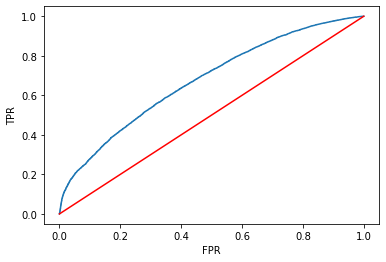

In [88]:
lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Scaling the data

In [89]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Random Forest

confusion matrix - Train : 
 [[17561     0]
 [    0 60213]]
Overall accuracy - Train: 
 1.0
AUC-Train: 
 1.0


confusion matrix - Test: 
 [[ 2007  5605]
 [  735 24986]]
Overall accuracy - Test: 
 0.8097980979809798
AUC-Test: 
 0.7805694746179154


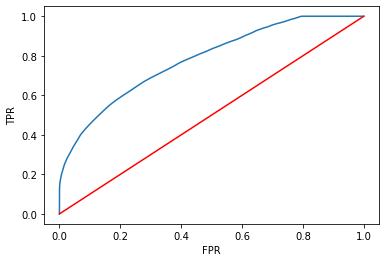

In [90]:
rfc = RandomForestClassifier(n_estimators=100,random_state=3)
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
print('confusion matrix - Train : \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train: \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train: \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]
print('\n')
print('confusion matrix - Test: \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test: \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test: \n',roc_auc_score(y_test,y_test_prob))
fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [91]:
imp =pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['IMP'])
imp = imp.sort_values(by='IMP', ascending=False)
imp

,IMP
Current Loan Amount,0.225194
Annual Income,0.211309
Maximum Open Credit,0.196651
Years of Credit History,0.170599
Credit Score,0.164482
Term,0.013233
Home Ownership_Rent,0.008449
Purpose_Home Improvements,0.005961
Purpose_Buy a Car,0.002308
Purpose_small_business,0.001813


In [92]:
print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17561
           1       1.00      1.00      1.00     60213

    accuracy                           1.00     77774
   macro avg       1.00      1.00      1.00     77774
weighted avg       1.00      1.00      1.00     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.73      0.26      0.39      7612
           1       0.82      0.97      0.89     25721

    accuracy                           0.81     33333
   macro avg       0.77      0.62      0.64     33333
weighted avg       0.80      0.81      0.77     33333



Cheking for Boosting techniques

In [93]:
from sklearn import model_selection

import lightgbm as lgm

import xgboost as xgb

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

In [94]:
models=[]
models.append(('Lightgbm',LGBMClassifier()))
models.append(('xgboost',XGBClassifier()))

In [95]:
results=[]
names=[]
for name,model in models:
    kfold= model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results= model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

Lightgbm 0.7557481889835759
xgboost 0.7510445569457539


overall accuracy -Train:  0.8234371383752925
confusion matrix:
 [[ 3944 13617]
 [  115 60098]]
AUC-train: 0.8011093281190669
overall accuracy -Test:  0.8183181831818318
confusion matrix:
 [[ 1670  5942]
 [  114 25607]]
AUC-test: 0.7566269808670645


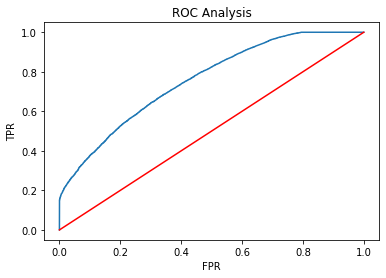

In [96]:
lgbm= lgm.LGBMClassifier(n_estimators=100,random_state=1234)
lgbm.fit(X_train,y_train)

train_pred=lgbm.predict(X_train)
train_prob=lgbm.predict_proba(X_train)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_train,train_pred))
print('confusion matrix:\n',confusion_matrix (y_train,train_pred))

print('AUC-train:',roc_auc_score(y_train,train_prob))

test_pred=lgbm.predict(X_test)
test_prob=lgbm.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [97]:
print('classification report - Train \n', classification_report(y_train,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.97      0.22      0.36     17561
           1       0.82      1.00      0.90     60213

    accuracy                           0.82     77774
   macro avg       0.89      0.61      0.63     77774
weighted avg       0.85      0.82      0.78     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.94      0.22      0.36      7612
           1       0.81      1.00      0.89     25721

    accuracy                           0.82     33333
   macro avg       0.87      0.61      0.62     33333
weighted avg       0.84      0.82      0.77     33333



overall accuracy -Train:  0.8317818294031425
confusion matrix:
 [[ 4703 12858]
 [  225 59988]]
AUC-train: 0.8372890034202018
overall accuracy -Test:  0.8171181711817118
confusion matrix:
 [[ 1768  5844]
 [  252 25469]]
AUC-test: 0.751940371784922


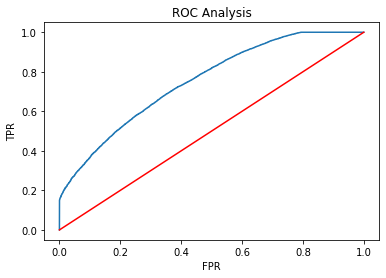

In [98]:
xgbm= xgb.XGBClassifier(n_estimators=100,random_state=1234)
xgbm.fit(X_train,y_train)

train_pred=xgbm.predict(X_train)
train_prob=xgbm.predict_proba(X_train)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_train,train_pred))
print('confusion matrix:\n',confusion_matrix (y_train,train_pred))

print('AUC-train:',roc_auc_score(y_train,train_prob))

test_pred=xgbm.predict(X_test)
test_prob=xgbm.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [99]:
print('classification report - Train \n', classification_report(y_train,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.95      0.27      0.42     17561
           1       0.82      1.00      0.90     60213

    accuracy                           0.83     77774
   macro avg       0.89      0.63      0.66     77774
weighted avg       0.85      0.83      0.79     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.88      0.23      0.37      7612
           1       0.81      0.99      0.89     25721

    accuracy                           0.82     33333
   macro avg       0.84      0.61      0.63     33333
weighted avg       0.83      0.82      0.77     33333



Confusion Matrix:  
 [[ 3533 14028]
 [   22 60191]]
Overall Accuracy -Train:  0.8193483683493198
AUC-Train: 0.7474576229462757
Confusion Matrix: -Test 
 [[ 1564  6048]
 [   20 25701]]
Overall Accuracy -Test:  0.8179581795817958
AUC-Test: 0.7435277092110715


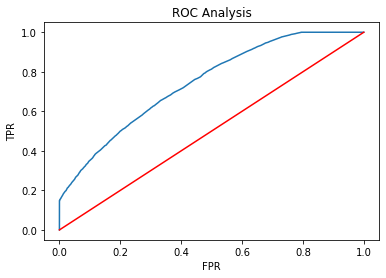

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier(random_state=1234)
ada.fit(X_train, y_train)


y_train_pred= ada.predict(X_train)
y_train_prob= ada.predict_proba(X_train)[:,1]

print('Confusion Matrix: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy -Train: ', accuracy_score(y_train, y_train_pred))
print('AUC-Train:',roc_auc_score(y_train, y_train_prob))

y_test_pred= ada.predict(X_test)
y_test_prob= ada.predict_proba(X_test)[:,1]

print('Confusion Matrix: -Test', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy -Test: ', accuracy_score(y_test, y_test_pred))
print('AUC-Test:',roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [ ]:
print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

In [102]:
dfff['Loan Status'].value_counts()

1    85934
0    25173
Name: Loan Status, dtype: int64

In [103]:
X=dfff[signi_cols]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [104]:
from sklearn.utils import resample 
upsample_data  = pd.concat([X_train, y_train], axis=1)

In [105]:
majority = upsample_data[upsample_data["Loan Status"]==1] 
minority = upsample_data[upsample_data["Loan Status"]==0]  
minority_upsampled = resample(minority, replace=True ,n_samples=60213 ,random_state=42)  
del(upsample_data) 
upsample_data = pd.concat([majority,minority_upsampled])

In [106]:
X=dfff[signi_cols]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [107]:
X_trains= upsample_data.drop('Loan Status', axis=1)
y_trains= upsample_data['Loan Status']

In [108]:
upsample_data['Loan Status'].value_counts()

1    60213
0    60213
Name: Loan Status, dtype: int64

In [ ]:
lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_trains,y_trains)
y_train_pred = lr.predict(X_trains)
y_train_prob = lr.predict_proba(X_trains)
y_train_prob = lr.predict_proba(X_trains)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_trains,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_trains,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_trains,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
print('classification report - Train \n', classification_report(y_trains,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

overall accuracy -Train:  0.7158919170278844
confusion matrix:
 [[42090 18123]
 [16091 44122]]
AUC-train: 0.8077193964735658
overall accuracy -Test:  0.6902469024690246
confusion matrix:
 [[ 4783  2829]
 [ 7496 18225]]
AUC-test: 0.7561208728703497


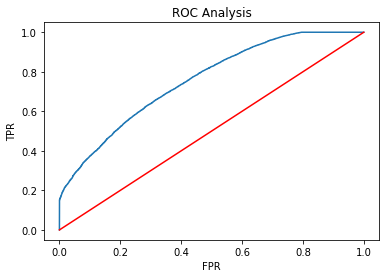

In [109]:
lgbm= lgm.LGBMClassifier(n_estimators=100,random_state=3)
lgbm.fit(X_trains,y_trains)

train_pred=lgbm.predict(X_trains)
train_prob=lgbm.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=lgbm.predict(X_test)
test_prob=lgbm.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [110]:
print('classification report - Train \n', classification_report(y_trains,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71     60213
           1       0.71      0.73      0.72     60213

    accuracy                           0.72    120426
   macro avg       0.72      0.72      0.72    120426
weighted avg       0.72      0.72      0.72    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.39      0.63      0.48      7612
           1       0.87      0.71      0.78     25721

    accuracy                           0.69     33333
   macro avg       0.63      0.67      0.63     33333
weighted avg       0.76      0.69      0.71     33333



confusion matrix - Train : 
 [[60213     0]
 [    0 60213]]
Overall accuracy - Train: 
 1.0
AUC-Train: 
 1.0


confusion matrix - Test: 
 [[ 2456  5156]
 [ 1546 24175]]
Overall accuracy - Test: 
 0.7989379893798938
AUC-Test: 
 0.7794731575620788


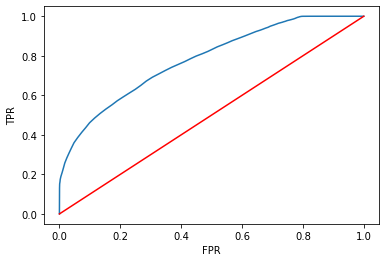

In [111]:
rfc = RandomForestClassifier(n_estimators=100,random_state=3)
rfc.fit(X_trains,y_trains)
y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]
print('confusion matrix - Train : \n',confusion_matrix(y_trains,y_train_pred))
print('Overall accuracy - Train: \n',accuracy_score(y_trains,y_train_pred))
print('AUC-Train: \n',roc_auc_score(y_trains,y_train_prob))

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]
print('\n')
print('confusion matrix - Test: \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test: \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test: \n',roc_auc_score(y_test,y_test_prob))
fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [112]:
print('classification report - Train \n', classification_report(y_trains,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60213
           1       1.00      1.00      1.00     60213

    accuracy                           1.00    120426
   macro avg       1.00      1.00      1.00    120426
weighted avg       1.00      1.00      1.00    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.61      0.32      0.42      7612
           1       0.82      0.94      0.88     25721

    accuracy                           0.80     33333
   macro avg       0.72      0.63      0.65     33333
weighted avg       0.78      0.80      0.77     33333



overall accuracy -Train:  0.75438858718217
confusion matrix:
 [[44731 15482]
 [14096 46117]]
AUC-train: 0.849730180052588
overall accuracy -Test:  0.7026370263702637
confusion matrix:
 [[ 4565  3047]
 [ 6865 18856]]
AUC-test: 0.7508331679676061


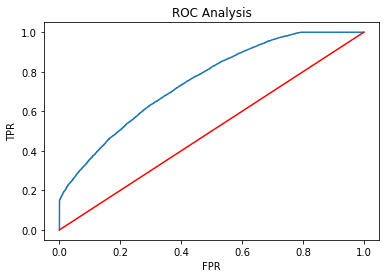

In [113]:
xgbm= xgb.XGBClassifier(n_estimators=100,random_state=1234)
xgbm.fit(X_trains,y_trains)

train_pred=xgbm.predict(X_trains)
train_prob=xgbm.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=xgbm.predict(X_test)
test_prob=xgbm.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [114]:
print('classification report - Train \n', classification_report(y_trains,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75     60213
           1       0.75      0.77      0.76     60213

    accuracy                           0.75    120426
   macro avg       0.75      0.75      0.75    120426
weighted avg       0.75      0.75      0.75    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.40      0.60      0.48      7612
           1       0.86      0.73      0.79     25721

    accuracy                           0.70     33333
   macro avg       0.63      0.67      0.64     33333
weighted avg       0.76      0.70      0.72     33333



Confusion Matrix:  
 [[41623 18590]
 [21804 38409]]
Overall Accuracy -Train:  0.664574095295036
AUC-Train: 0.7485799026021909
Confusion Matrix: -Test 
 [[ 5256  2356]
 [ 9505 16216]]
Overall Accuracy -Test:  0.6441664416644166
AUC-Test: 0.7454149317396226


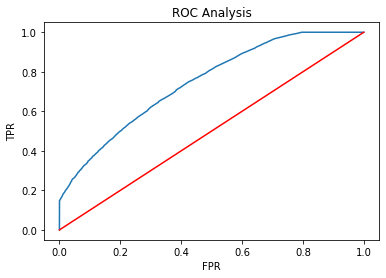

In [115]:
ada= AdaBoostClassifier(random_state=1234)
ada.fit(X_trains, y_trains)


y_train_pred= ada.predict(X_trains)
y_train_prob= ada.predict_proba(X_trains)[:,1]

print('Confusion Matrix: ', '\n', confusion_matrix(y_trains, y_train_pred))
print('Overall Accuracy -Train: ', accuracy_score(y_trains, y_train_pred))
print('AUC-Train:',roc_auc_score(y_trains, y_train_prob))

y_test_pred= ada.predict(X_test)
y_test_prob= ada.predict_proba(X_test)[:,1]

print('Confusion Matrix: -Test', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy -Test: ', accuracy_score(y_test, y_test_pred))
print('AUC-Test:',roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [116]:
print('classification report - Train \n', classification_report(y_trains,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67     60213
           1       0.67      0.64      0.66     60213

    accuracy                           0.66    120426
   macro avg       0.67      0.66      0.66    120426
weighted avg       0.67      0.66      0.66    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.36      0.69      0.47      7612
           1       0.87      0.63      0.73     25721

    accuracy                           0.64     33333
   macro avg       0.61      0.66      0.60     33333
weighted avg       0.76      0.64      0.67     33333



In [117]:
from sklearn import svm

In [118]:
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_trains, y_trains).predict_proba(X_test)

In [121]:
from sklearn.metrics import roc_curve, auc

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.322787


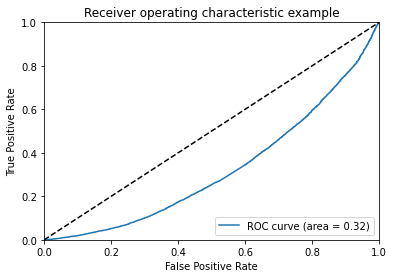

In [123]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [124]:
support_vectors = classifier.support_vectors_
support_vectors

array([[6.60123012, 2.64606756, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [6.60529792, 2.62063392, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.68586095, 2.6023785 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [6.60934924, 2.62540194, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.60665019, 2.64011093, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.5971457 , 2.6260466 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

overall accuracy -Train:  0.6236360918738478
confusion matrix:
 [[34552 25661]
 [19663 40550]]
AUC-train: 0.3227698062524576
overall accuracy -Test:  0.6530165301653017
confusion matrix:
 [[ 4435  3177]
 [ 8389 17332]]
AUC-test: 0.32278729880074725


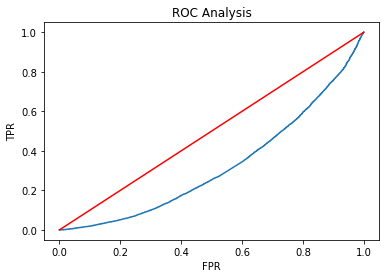

In [125]:
train_pred=classifier.predict(X_trains)
train_prob=classifier.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=classifier.predict(X_test)
test_prob=classifier.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [126]:
train_pred=classifier.predict(X_trains)
test_pred=classifier.predict(X_test)

In [127]:
print('classification report - Train \n', classification_report(y_trains,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.64      0.57      0.60     60213
           1       0.61      0.67      0.64     60213

    accuracy                           0.62    120426
   macro avg       0.62      0.62      0.62    120426
weighted avg       0.62      0.62      0.62    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.35      0.58      0.43      7612
           1       0.85      0.67      0.75     25721

    accuracy                           0.65     33333
   macro avg       0.60      0.63      0.59     33333
weighted avg       0.73      0.65      0.68     33333



In [128]:
score_svm = round(accuracy_score(test_pred,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 65.3 %


confusion matrix - Train : 
 [[60213     0]
 [    0 60213]]
Overall accuracy - Train: 
 1.0
AUC-Train: 
 1.0


confusion matrix - Test: 
 [[ 2456  5156]
 [ 1546 24175]]
Overall accuracy - Test: 
 0.7989379893798938
AUC-Test: 
 0.7794731575620788


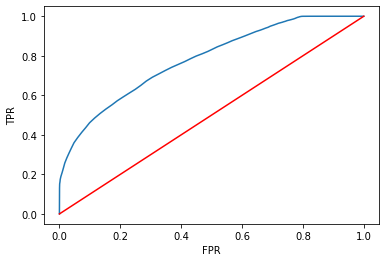

In [129]:
rfc.fit(X_trains,y_trains)
y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]
print('confusion matrix - Train : \n',confusion_matrix(y_trains,y_train_pred))
print('Overall accuracy - Train: \n',accuracy_score(y_trains,y_train_pred))
print('AUC-Train: \n',roc_auc_score(y_trains,y_train_prob))

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]
print('\n')
print('confusion matrix - Test: \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test: \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test: \n',roc_auc_score(y_test,y_test_prob))
fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [130]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_trains, y_trains)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.5927159271592716


In [131]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model
knn.fit(X_trains, y_trains)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.7071370713707137


overall accuracy -Train:  0.8400013286167439
confusion matrix:
 [[56419  3794]
 [15474 44739]]
AUC-train: 0.9447642438660565
overall accuracy -Test:  0.5927159271592716
confusion matrix:
 [[ 3570  4042]
 [ 9534 16187]]
AUC-test: 0.5701991940762615


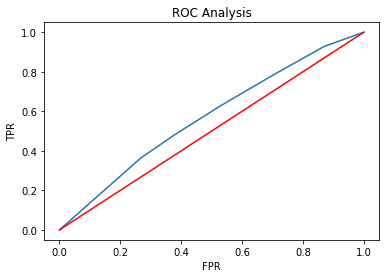

In [132]:
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_trains, y_trains)

train_pred=knn.predict(X_trains)
train_prob=knn.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=knn.predict(X_test)
test_prob=knn.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_trains = sc.fit_transform(X_trains)
X_test = sc.transform(X_test)

In [134]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [135]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_trains,y_trains)

GaussianNB(priors=None, var_smoothing=1e-09)

In [136]:
y_pred = naiveClassifier.predict(X_test)

overall accuracy -Train:  0.6312507265872818
confusion matrix:
 [[37568 22645]
 [21762 38451]]
AUC-train: 0.6894157376784268
overall accuracy -Test:  0.6341163411634116
confusion matrix:
 [[ 4790  2822]
 [ 9374 16347]]
AUC-test: 0.6883528639910428


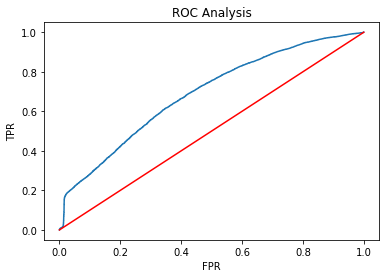

In [137]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_trains,y_trains)

train_pred=naiveClassifier.predict(X_trains)
train_prob=naiveClassifier.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=naiveClassifier.predict(X_test)
test_prob=naiveClassifier.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [138]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.34      0.44     14164
           1       0.64      0.85      0.73     19169

    accuracy                           0.63     33333
   macro avg       0.63      0.60      0.58     33333
weighted avg       0.63      0.63      0.61     33333



In [139]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [140]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains, y_trains)
    # predict the response
    test_prob=knn.predict_proba(X_test)[:,1]
    # evaluate accuracy
    scores = roc_auc_score(y_test, test_prob)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


overall accuracy -Train:  0.7372245196220085
confusion matrix:
 [[46407 13806]
 [17839 42374]]
AUC-train: 0.8315963076896028
overall accuracy -Test:  0.6466564665646657
confusion matrix:
 [[ 4510  3102]
 [ 8676 17045]]
AUC-test: 0.698850470354064


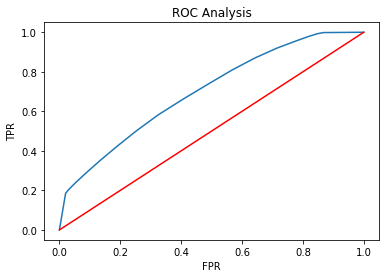

In [141]:
knn = KNeighborsClassifier(n_neighbors=17)

# fitting the model
knn.fit(X_trains, y_trains)

train_pred=knn.predict(X_trains)
train_prob=knn.predict_proba(X_trains)[:,1]

train_prob

print('overall accuracy -Train: ',accuracy_score(y_trains,train_pred))
print('confusion matrix:\n',confusion_matrix (y_trains,train_pred))

print('AUC-train:',roc_auc_score(y_trains,train_prob))

test_pred=knn.predict(X_test)
test_prob=knn.predict_proba(X_test)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test,test_pred))
print('AUC-test:',roc_auc_score(y_test,test_prob))

fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()

In [142]:
print('classification report - Train \n', classification_report(y_trains,train_pred))
print('classification report - Test \n ', classification_report(y_test,test_pred))

classification report - Train 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75     60213
           1       0.75      0.70      0.73     60213

    accuracy                           0.74    120426
   macro avg       0.74      0.74      0.74    120426
weighted avg       0.74      0.74      0.74    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.34      0.59      0.43      7612
           1       0.85      0.66      0.74     25721

    accuracy                           0.65     33333
   macro avg       0.59      0.63      0.59     33333
weighted avg       0.73      0.65      0.67     33333

